/tmp/ipykernel_1430788/3321660178.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,6))


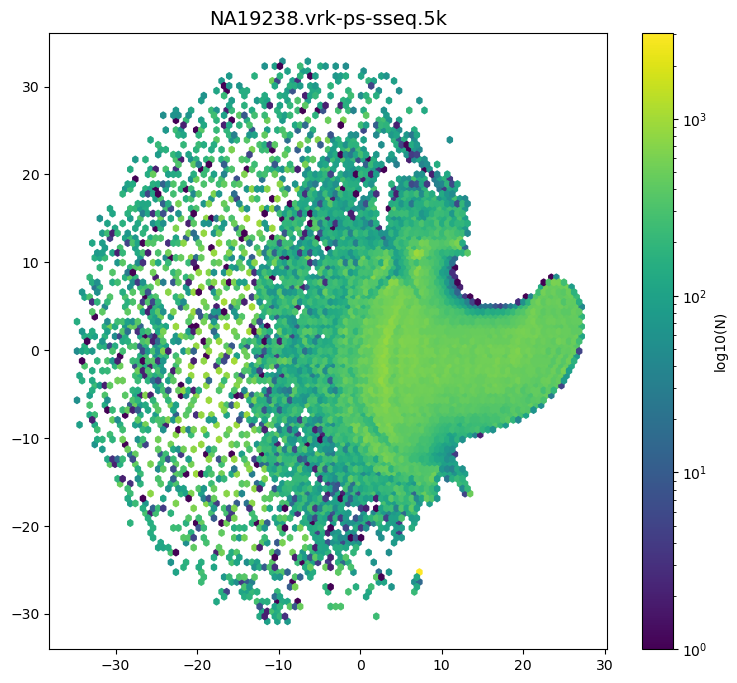

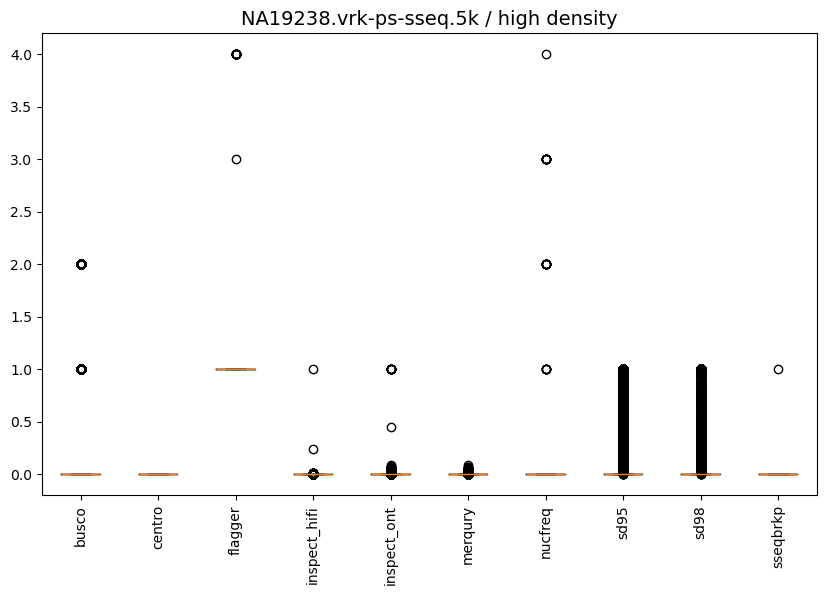

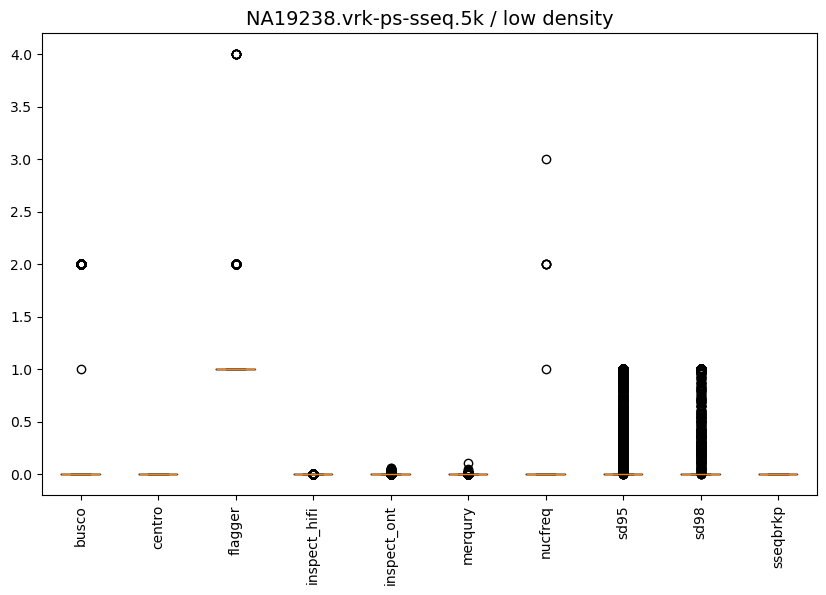

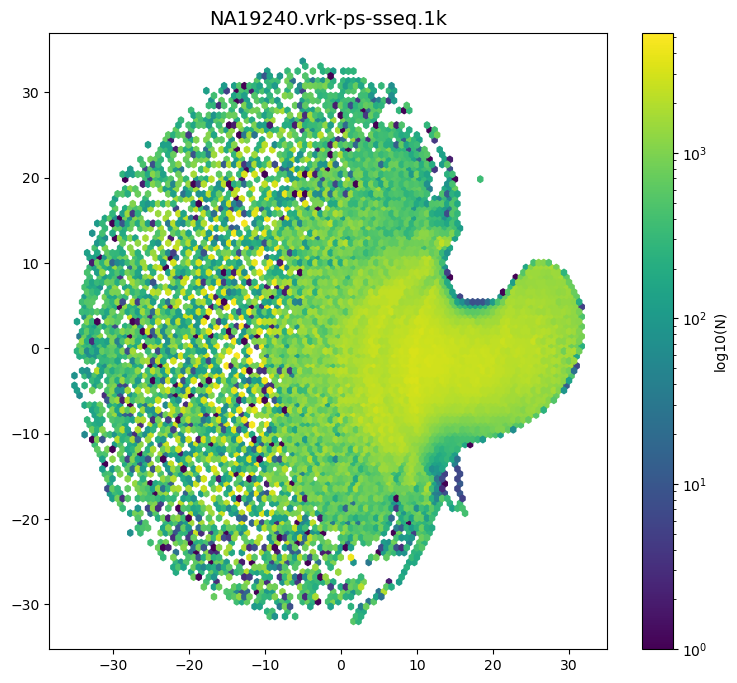

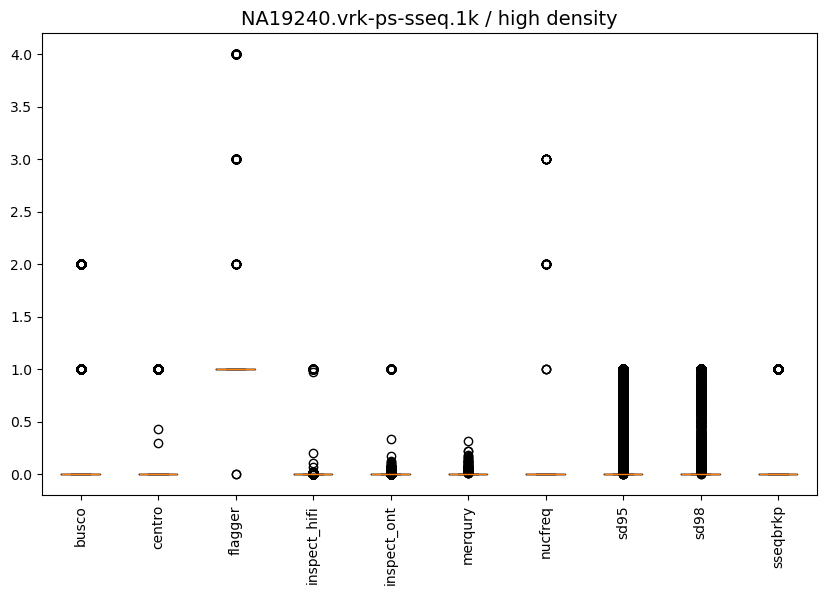

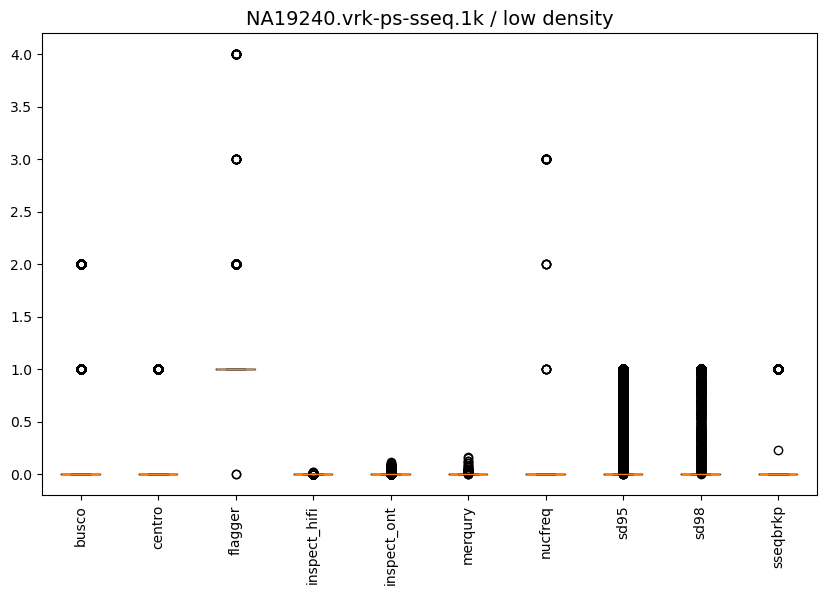

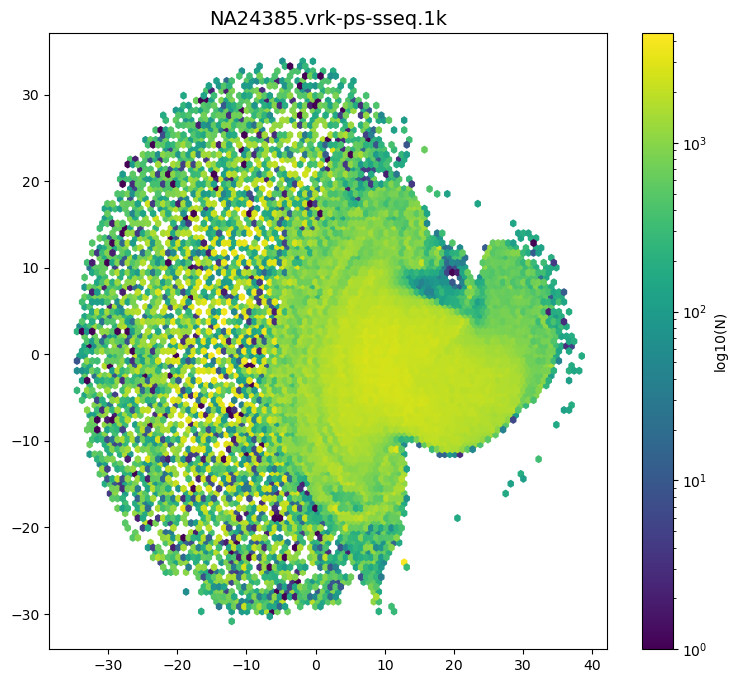

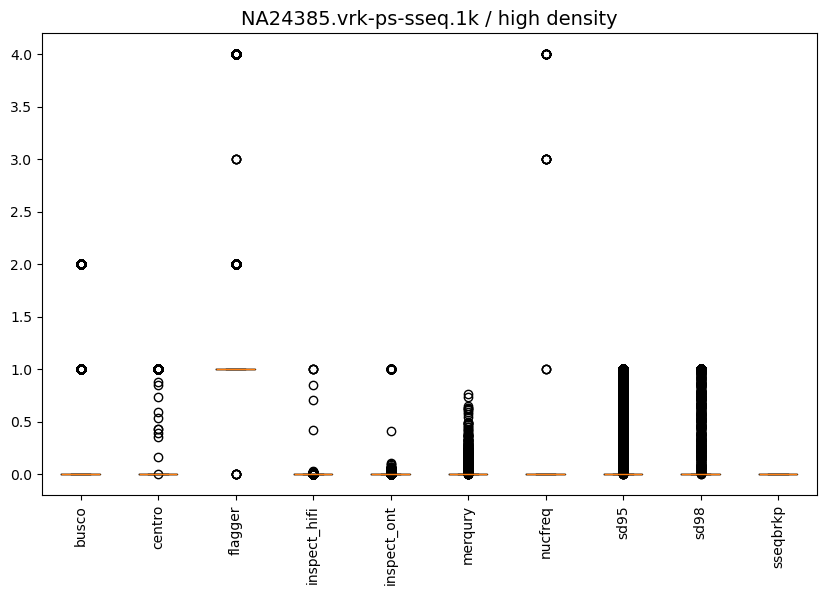

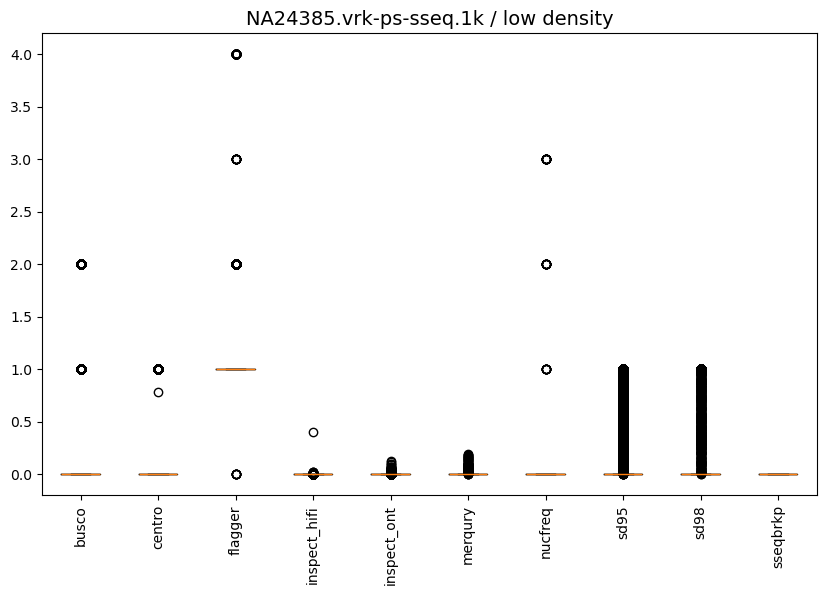

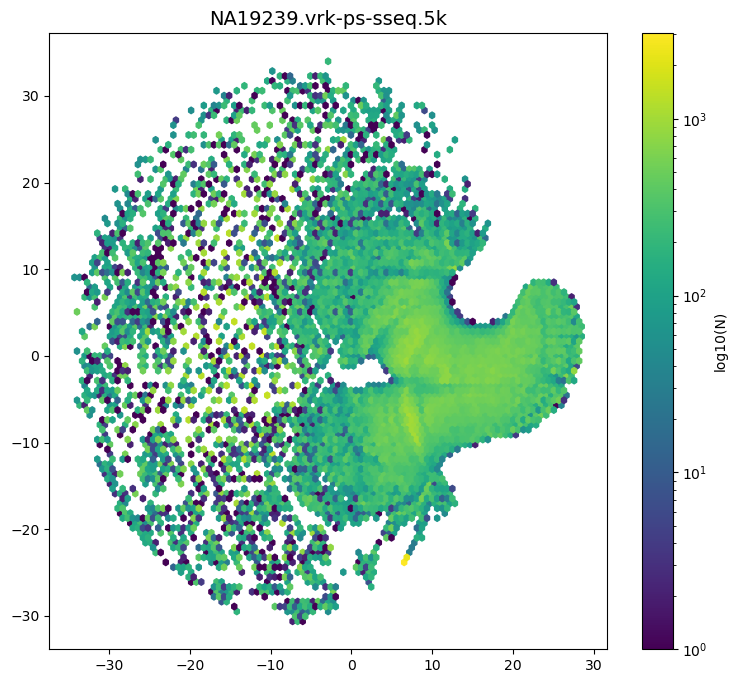

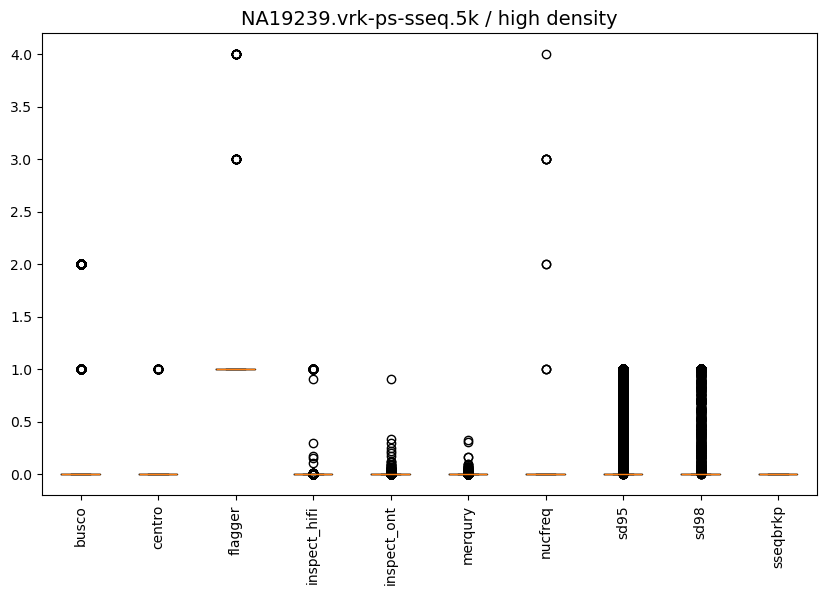

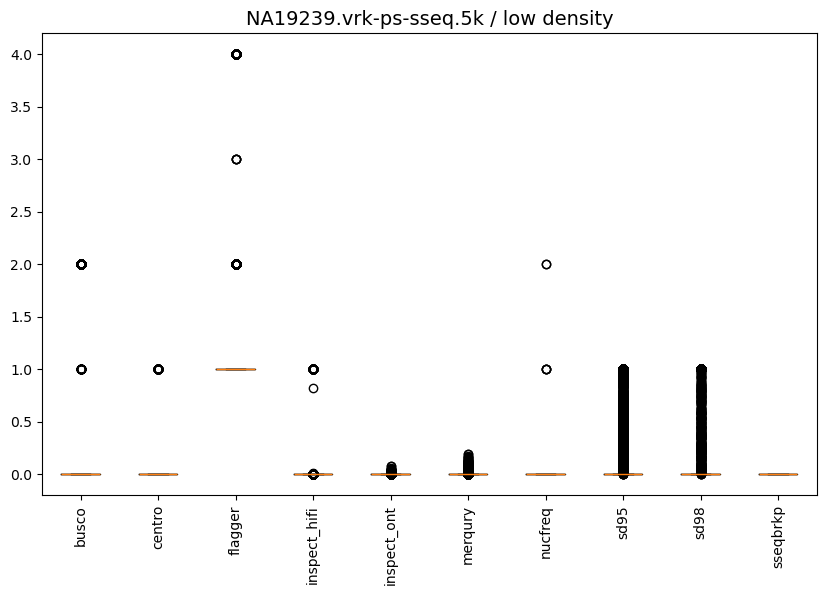

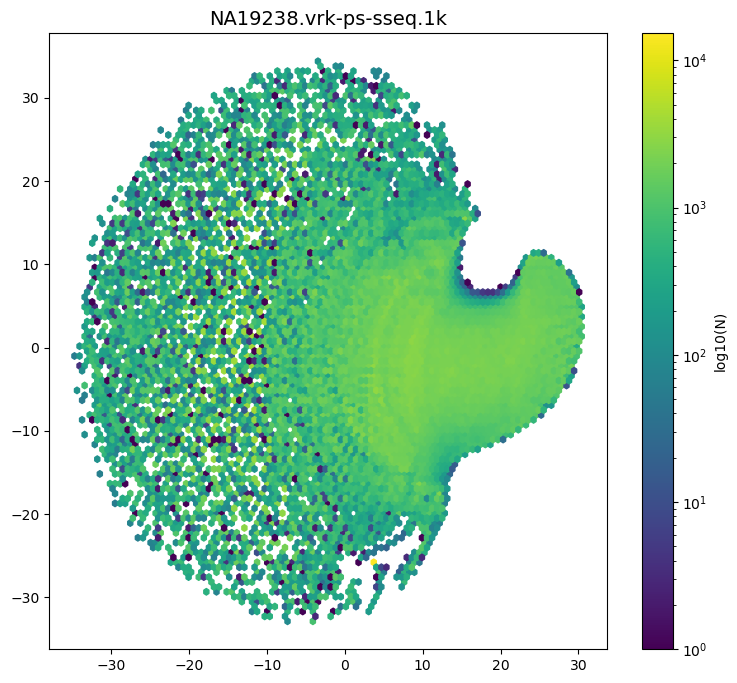

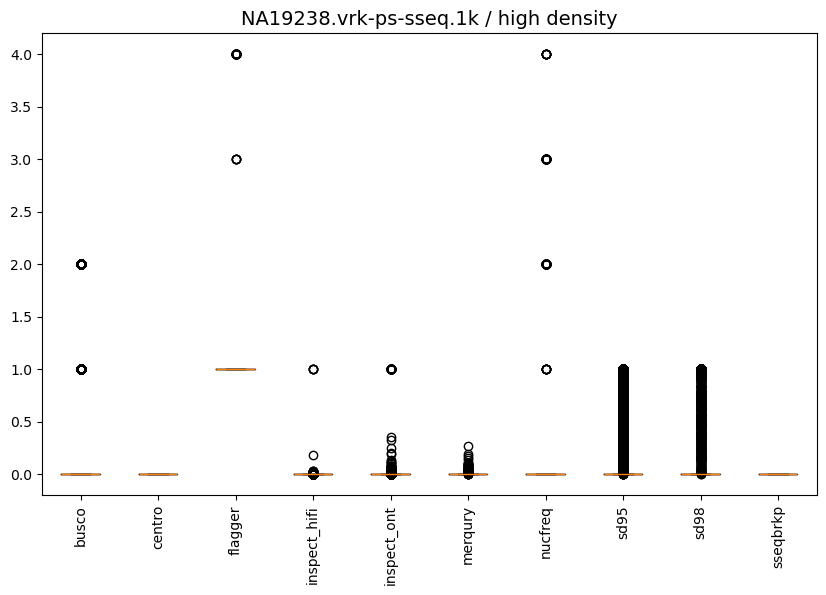

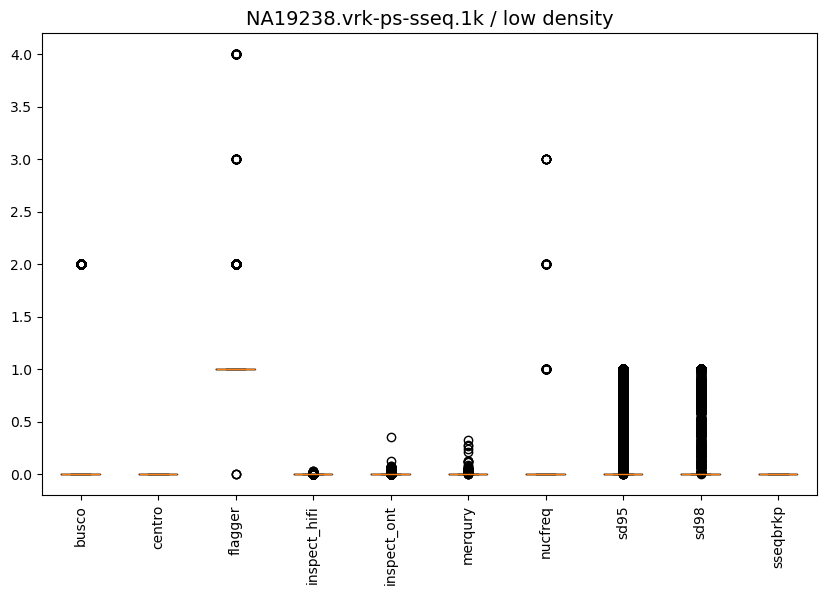

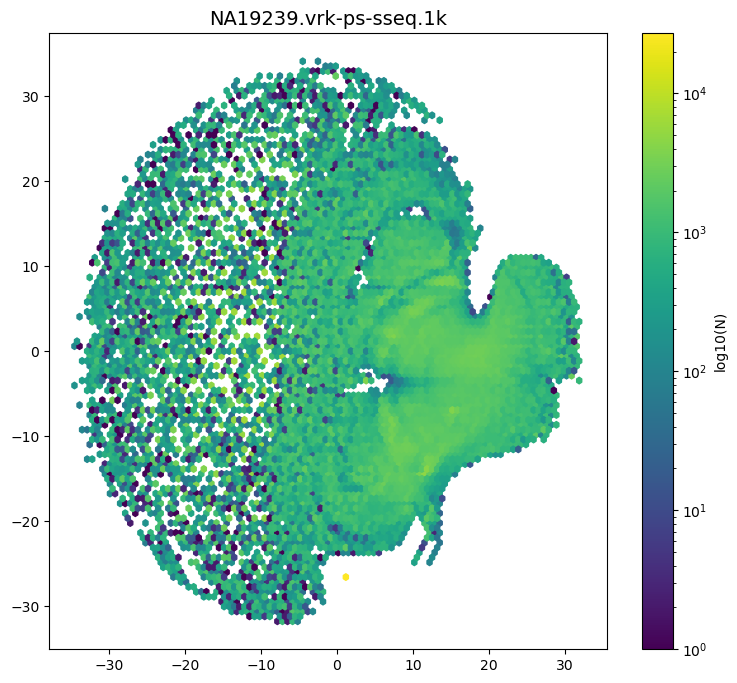

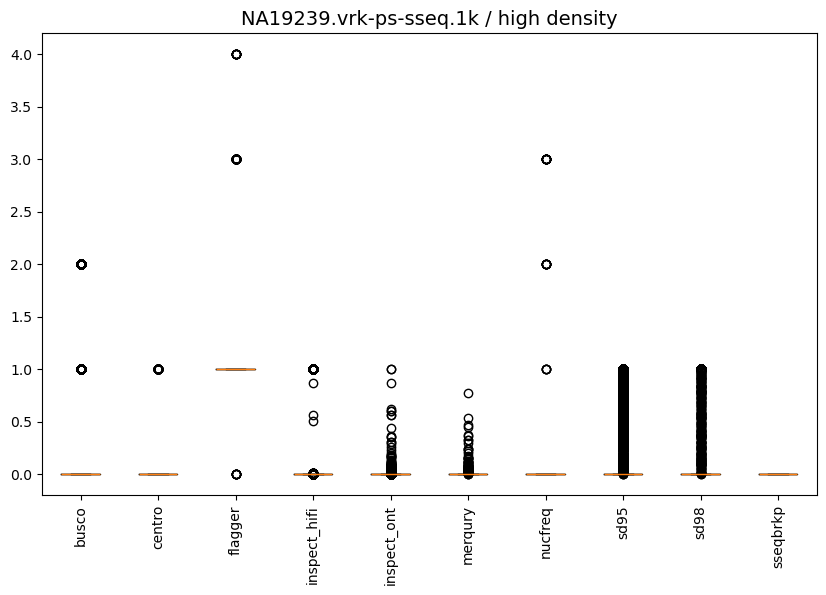

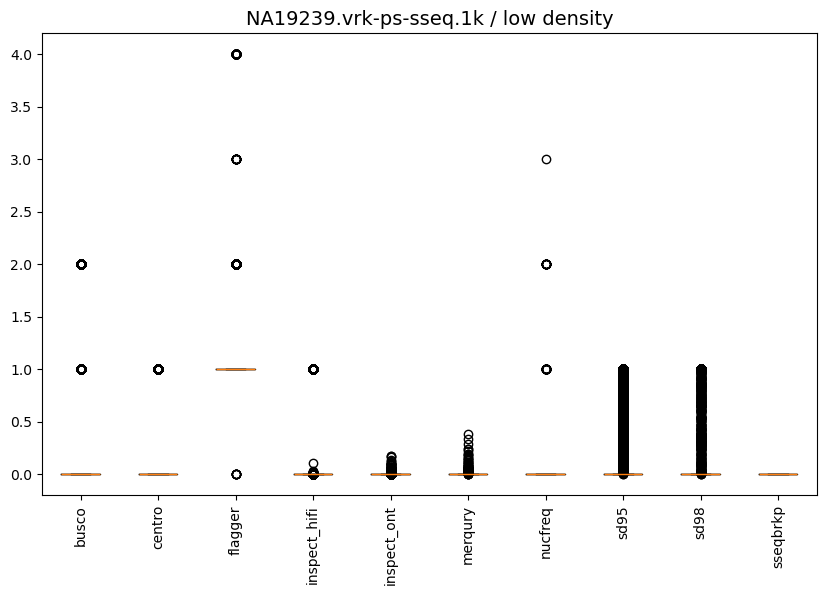

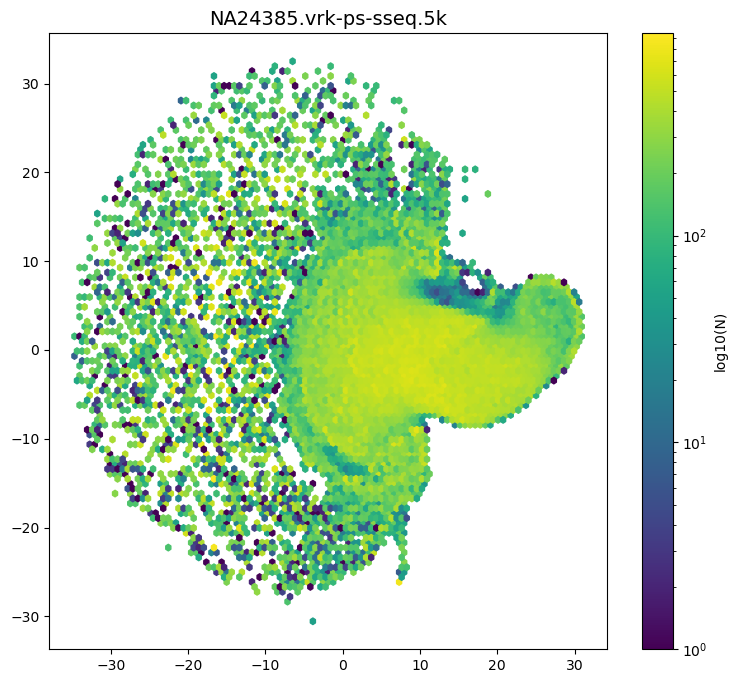

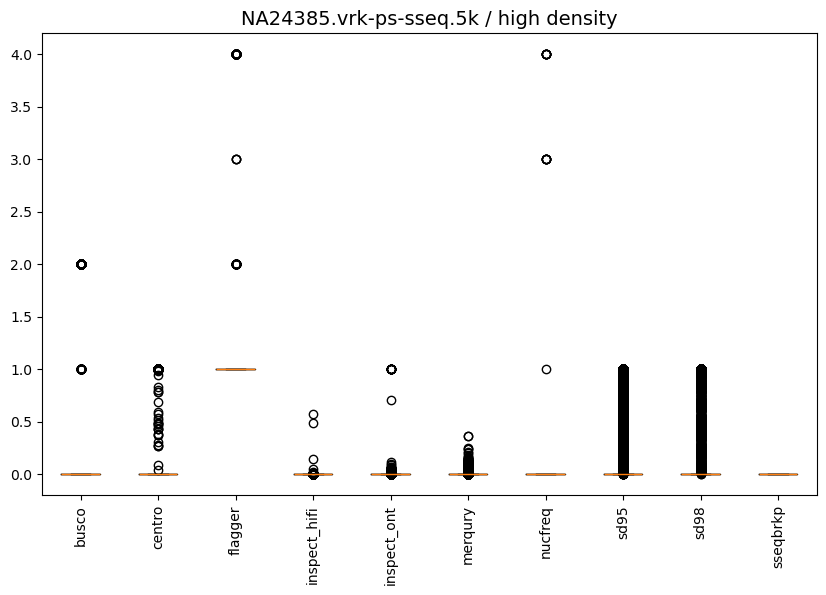

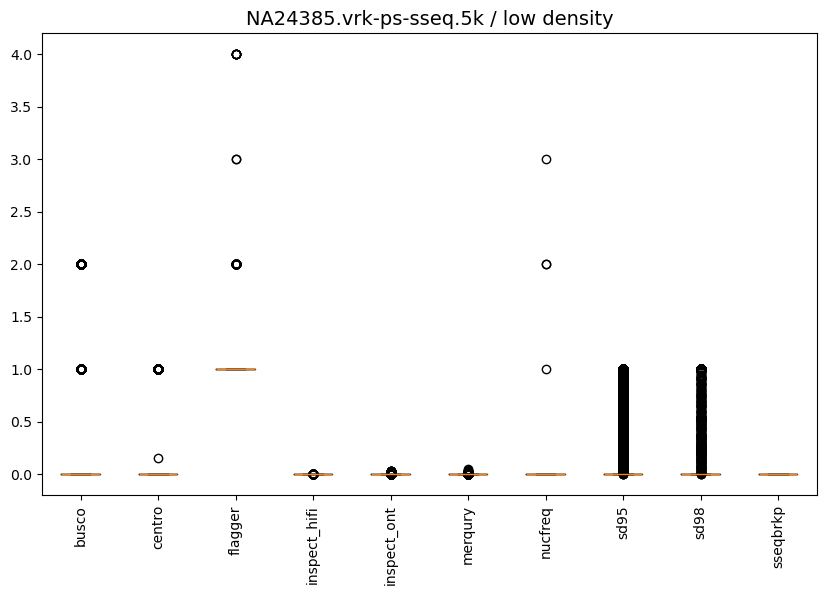

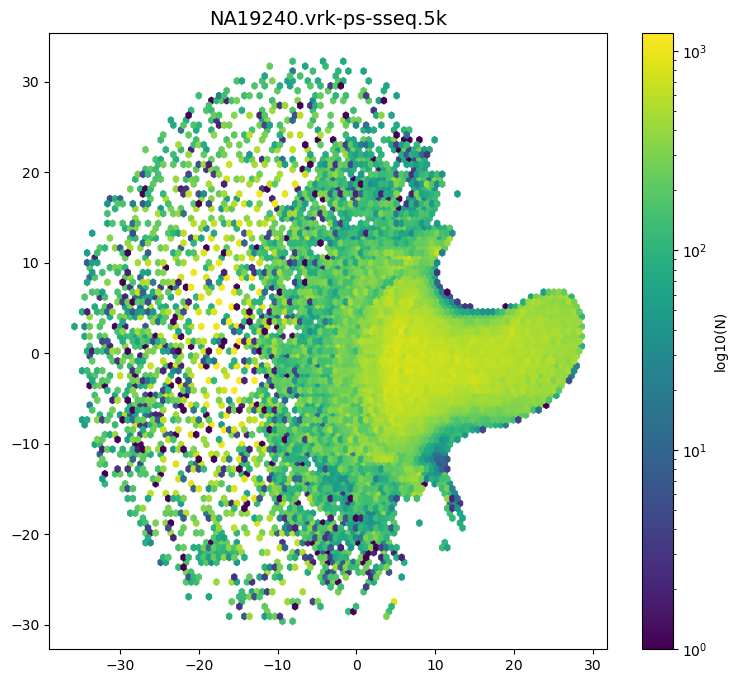

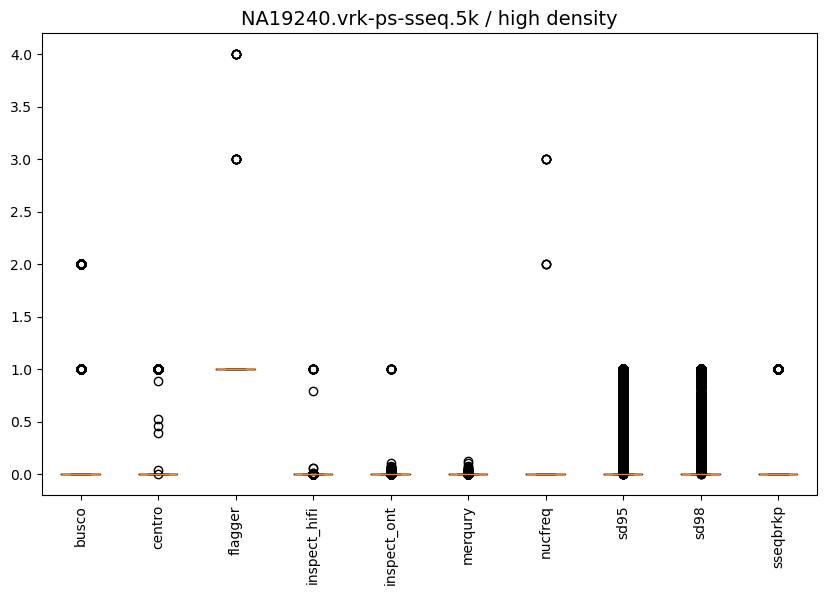

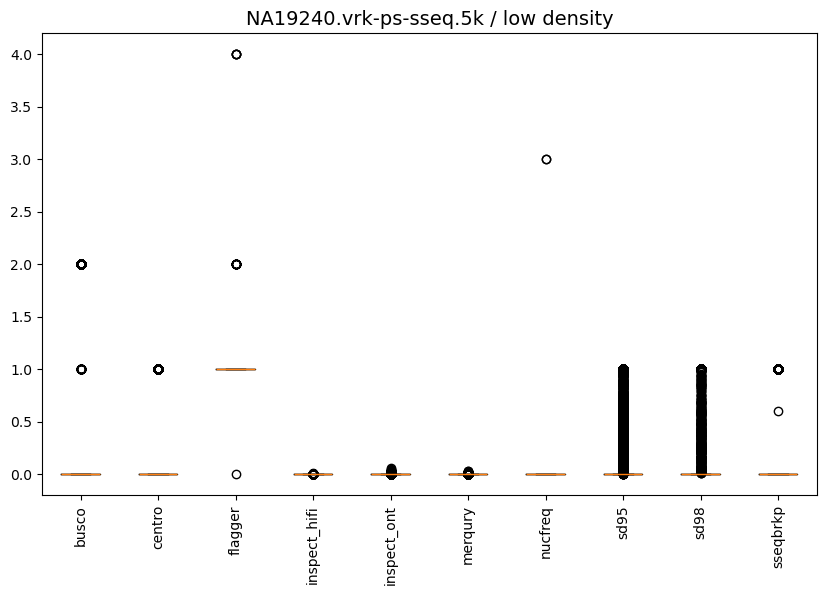

In [25]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib as pl
import numpy as np

root_folder = pl.Path("/home/ebertp/work/projects/hgsvc/2024_integqc")

datasets = root_folder.glob("*.npy")

def plot_density(embedded_data, title=None):

    fig, ax = plt.subplots(figsize=(9,8))
    
    hb = ax.hexbin(
        embedded_data[:, 0],
        embedded_data[:, 1],
        bins="log"
    )
    if title is not None:
        ax.set_title(title, fontsize=14)

    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('log10(N)')
  
    return


def plot_data_excerpt(binned_data, select_rows, title=None):

    fig, ax = plt.subplots(figsize=(10,6))

    plot_columns = [c for c in binned_data.columns if not c.startswith("rd_")]

    subset = binned_data.loc[select_rows, plot_columns]

    ax.boxplot(
        subset
    )
    ax.set_xticks(np.arange(1, subset.shape[1]+1))
    ax.set_xticklabels(subset.columns, fontsize=10, rotation=90)

    if title is not None:
        ax.set_title(title, fontsize=14)

    return


for data_file in datasets:
    sample = data_file.name.rsplit(".", 2)[0]
    embedding = np.load(data_file)
    plot_density(embedding, sample)

    binned_dataset = data_file.parent.joinpath(
        f"{sample}.binned-dataset.tsv.gz"
    ).resolve(strict=True)
    bin_data = pd.read_csv(binned_dataset, sep="\t", header=0)

    good_comp1 = (5 < embedding[:, 0]) & (embedding[:, 0] < 20)
    good_comp2 = (-5 < embedding[:, 1]) & (embedding[:, 1] < 5)
    good_select = good_comp1 & good_comp2

    bad_comp1 = (-30 < embedding[:, 0]) & (embedding[:, 0] < -15)
    bad_comp2 = (-25 < embedding[:, 1]) & (embedding[:, 1] < 25)
    bad_select = bad_comp1 & bad_comp2

    plot_data_excerpt(bin_data, good_select, f"{sample} / high density")
    plot_data_excerpt(bin_data, bad_select, f"{sample} / low density")


    
    


